In [3]:
import torch

model = torch.nn.Linear(4, 0)
x = torch.zeros(4)
x, model(x)

/home/achil/anaconda3/envs/dlwpytorch/lib/python3.11/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


(tensor([0., 0., 0., 0.]), tensor([], grad_fn=<AddBackward0>))

In [4]:
m = torch.nn.Sequential()
for p in m.named_parameters():
    print(p)

In [5]:
x = torch.FloatTensor([[1., 2.], [1, 2], [4, 5]])
x, torch.nn.functional.normalize(x)

(tensor([[1., 2.],
         [1., 2.],
         [4., 5.]]),
 tensor([[0.4472, 0.8944],
         [0.4472, 0.8944],
         [0.6247, 0.7809]]))

In [6]:
x = torch.zeros(4, 2)
y = torch.zeros(4, 2)

z = torch.cat([x, y])
torch.split(z, 4, 0)

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]))

In [26]:
import torch
import src.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

def plot_leads(signals, title="ECG"):
    N = signals.shape[0]
    fig, axs = plt.subplots(N//2, 2, figsize=(12, 18))
    t = np.linspace(0, 1, 2500) 
    for i, ax in enumerate(axs.flat):
        ax.plot(t, signals[i], color='blue')
        ax.set_title(f'Lead {i+1}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

l500 = torch.FloatTensor(
[  0.,   0.,  -2.,  -4.,   0.,  -7., -10.,  -8., -14., -10.,  -8.,
        -6., -14., -11., -11., -14., -14., -15.,  -9., -10., -14., -19.,
       -20.,  -9.,  -3.,  16.,  45.,  80., 123., 149., 145., 135.,  99.,
        55.,  24., -14., -35., -27., -13., -10.,  -7.,  -7., -11.,  -7.,
       -10.,  -8.,  -9.,  -7.,  -7.,  -4.,  -9.,  -2.,  -8.,   4.,  -2.,
        -2.,  -3.,   3.,   0.,  -1.,   1.,   8.,   0.,   2.,   7.,  17.,
         5.,   6.,  12.,  12.,  12.,  18.,  13.,  19.,  24.,  19.,  29.,
        23.,  30.,  33.,  40.,  34.,  37.,  48.,  43.,  49.,  51.,  54.,
        54.,  54.,  50.,  53.,  57.,  46.,  54.,  48.,  44.,  36.,  34.,
        25.,  22.,  11.,  21.,  10.,   2.,   6.,  -1.,   3.,   0.,  -3.,
        -2.,  -6.,  -8.,  -8.,  -9.,  -7., -13.,  -9., -11.,  -2., -12.,
        -7., -10., -11.,  -8.,  -7.,  -9.,  -9.,  -7., -11.,  -8., -11.,
        -6., -10.,  -6., -12.,  -8., -11.,  -7.,  -6.,  -7., -10.,  -9.,
       -11.,  -8., -11., -10.,  -4.,  -9., -10., -11.,  -9., -10.,  -8.,
       -12., -14., -13., -11., -10.,  -9., -12., -10., -10., -13., -12.,
        -6.,  -6., -12., -12., -14., -14., -13., -11.,  -9., -11.,  -8.,
       -11.,  -9., -13., -14., -13., -17., -11., -11., -15., -11., -12.,
       -14., -13., -10., -12., -12., -18., -14., -12., -17., -15.,  -7.,
       -15., -13., -11., -16., -17., -11., -13., -16., -11., -14., -14.,
       -13., -16., -18.,  -8., -11., -19.,  -9., -16., -13., -14., -15.,
       -17., -14., -13., -16., -11., -12., -17., -17., -13.,  -8., -10.,
       -14.,  -7., -15., -15.,  -7.,  -7., -14.,  -6.,  -7.,  -1.,  -6.,
         0.,   0.,   0.,  -3.,   1.,  -4.,  -5.,  -5., -14., -17., -16.,
       -17., -16., -15., -15., -14., -14., -15., -20., -18., -22., -13.,
       -15., -15., -23., -18.,  -7.,   3.,  38.,  80., 122., 149., 158.,
       152., 123.,  63.,  38.,  -4., -32., -33., -23., -13., -16.,  -8.,
        -7., -10., -10., -10., -13., -10., -10.,  -7.,  -6., -10.,  -7.,
         3.,  -3.,  -4.,  -2.,   1.,  -1.,   0.,   2.,   0.,   1.,   7.,
         9.,   9.,   8.,   8.,  10.,  12.,  14.,  19.,  13.,  19.,  25.,
        22.,  21.,  29.,  29.,  34.,  35.,  36.,  36.,  44.,  43.,  49.,
        58.,  55.,  59.,  56.,  57.,  52.,  61.,  54.,  52.,  54.,  42.,
        41.,  34.,  30.,  18.,  22.,  15.,  12.,   9.,  -2.,   1.,  -8.,
        -8.,  -4.,  -9., -12., -11., -12., -17.,  -7., -14., -14., -14.,
       -13., -18., -15., -11., -14., -13., -14., -10., -17., -10., -13.,
       -15., -10., -16.,  -9., -10., -13., -12.,  -9.,  -8., -16., -14.,
       -12.,  -6.,  -8.,  -8.,  -8.,  -8., -11., -10.,  -6., -11., -10.,
        -9., -10., -11., -11., -14.,  -8., -11., -14.,  -9.,  -9.,  -9.,
       -14., -14., -14., -16., -12.,  -5., -18., -16.,  -8.,  -8., -14.,
       -11., -10., -14., -12.,  -7., -16., -10., -13.,  -8.,  -1., -19.,
       -17.,  -6., -14., -19., -13., -19., -11.,  -4.,  -9., -10., -16.,
       -11., -12., -11., -19.,  -8., -15., -10.,  -9., -12., -14., -18.,
       -14., -10., -10., -12., -10., -11., -10., -13., -19.,  -8.,  -2.,
       -16., -11., -18., -13.,  -9.,  -6., -12., -12., -13., -12.,  -8.,
       -12., -10.,  -6., -12., -12.,  -7.,  -8.,   3.,  -3.,   3.,   1.,
         7.,   6.,  -1.,  -1.,   5.,   0.,  -5.,  -4.,  -4.,  -6., -14.,
       -10.,  -7., -18., -19.,  -9.
])
l501 = torch.Tensor([ -4., -11., -14., -10., -12., -14., -12., -11., -16., -13.,  -1.,
        18.,  56.,  93., 142., 174., 169., 158., 120.,  56.,  26., -21.,
       -45., -29., -18., -15., -11.,  -4.,  -9.,  -8.,  -5.,  -8.,  -6.,
        -7.,  -2.,  -2.,  -4.,  -7.,   0.,   4.,   4.,  -1.,  -1.,   5.,
         2.,   3.,   4.,   3.,   9.,   5.,   8.,   7.,   9.,  16.,   9.,
        17.,  17.,  19.,  15.,  24.,  20.,  27.,  28.,  30.,  33.,  37.,
        39.,  40.,  40.,  47.,  48.,  50.,  59.,  61.,  59.,  56.,  63.,
        62.,  61.,  56.,  57.,  55.,  46.,  42.,  38.,  32.,  20.,  16.,
        14.,   4.,   5.,   1.,   2.,   0., -10.,  -2.,  -9., -12., -12.,
       -15., -11., -10.,  -9., -14.,  -9., -15., -14., -14., -18., -19.,
       -12., -14.,  -9., -13., -14., -14., -19., -10., -11., -17., -14.,
        -8., -14., -11., -10., -11.,  -5., -11., -11.,  -8.,  -9.,  -9.,
       -15., -14., -13.,  -9., -13., -13., -20., -11., -15., -18.,  -9.,
       -16., -18., -14., -15., -18., -18., -18., -15., -16., -15., -13.,
       -19., -18., -11., -19., -18., -13., -17., -17., -15., -19., -16.,
       -17., -17., -19., -17., -18., -18., -22., -27., -13., -10., -13.,
       -12., -16.,  -8., -18., -12., -18., -13., -17., -13., -14., -12.,
       -15., -13., -23., -14., -17., -16.,  -7., -16., -11., -16., -14.,
       -16., -13., -15.,  -7.,  -9., -12., -14.,  -7., -14., -14., -10.,
       -11., -14., -16., -10.,  -4.,  -9.,  -2.,  -8.,  -7.,  -3.,  -1.,
         0.,   2.,  -6.,   0.,  -2.,  -4.,  -9., -14., -10., -15., -17.,
       -16., -17., -21., -19., -17., -26., -26., -19., -19., -17., -16.,
       -25., -22., -16., -16.,  -4.,  27.,  68., 113., 138., 143., 133.,
        96.,  43.,  19., -25., -53., -40., -32., -28., -12., -15., -20.,
       -18., -18., -16., -12., -12., -15., -15.,  -9., -10.,  -9., -11.,
        -7.,  -7.,  -8.,  -3.,  -4.,  -7.,  -8.,  -4.,   0.,  -7.,   0.,
         1.,   1.,  -1.,   3.,   7.,   7.,   7.,  11.,  13.,  10.,  18.,
        17.,  18.,  17.,  30.,  31.,  29.,  32.,  36.,  39.,  39.,  45.,
        46.,  48.,  45.,  51.,  53.,  42.,  49.,  46.,  41.,  34.,  33.,
        25.,  18.,  15.,  11.,  10.,   2.,  -4.,  -7.,  -7., -16., -14.,
       -12., -19., -14., -17., -19., -10., -19., -14., -25., -20., -14.,
       -16., -20., -15., -25., -14., -16., -17., -20., -16., -13., -17.,
       -16., -16.,  -9., -12., -10., -14., -14., -10., -12., -13., -13.,
       -13., -13., -12., -13., -14.,  -9., -10., -17., -11., -13., -15.,
       -11., -12., -17., -14., -15., -15., -18., -14.,  -9., -15., -18.,
       -15., -11., -11., -14., -10., -11., -16., -10., -12.,  -9.,  -9.,
        -7., -12., -10., -12.,  -8.,  -4., -10.,  -2.,  -7.,  -5.,  -4.,
       -12.,  -2.,  -6.,  -9.,  -3.,  -8.,  -9.,  -9.,  -2.,   0.,  -9.,
        -6.,  -8.,  -8.,  -7.,  -7., -12.,  -8.,  -8.,  -3., -11.,  -3.,
        -8.,  -8., -10.,  -9.,  -6., -11., -10.,  -1.,  -6., -10.,  -2.,
        -7.,  -6.,  -6.,  -5.,  -6.,  -7.,  -2.,  -6.,  -5.,   0.,   0.,
        -1.,   0.,   0.,   4.,   5.,   1.,   0.,   2.,  -2.,  -3., -13.,
        -9.,  -9.,  -5., -12.,  -7., -11.,  -8., -16., -16.,  -9., -12.,
        -7., -15., -14., -16., -17.,  -6.,  -2.,  18.,  58.,  99., 122.,
       138., 140., 127.,  78.,  39.,  15., -22., -31., -24., -15., -16.,
       -13., -14., -16., -18., -14.])
lead = torch.cat([l500, l501, l500, l501, l500]).unsqueeze(0)

blur = transforms.GaussianBlur({})
noise = transforms.GaussianNoise({"scale": 5})
sobel = transforms.SobelDerivative({})
identity = transforms.Identity()
scale = transforms.Scale()
timewrap = transforms.TimeWarp({"stretch_factor": 0.1})
reverse = transforms.Reverse()
wanderer = transforms.RandWanderer({"amp": 5, "start_phase": 10, "end_phase": 100})
invert = transforms.Invert()
crop = transforms.RandomResizedCrop({"n_samples": 500})

# plot_leads(torch.cat([lead, blur(lead), noise(lead), sobel(lead)]).squeeze(1))



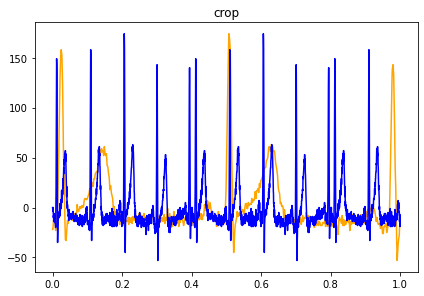

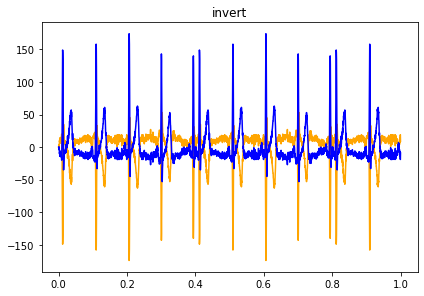

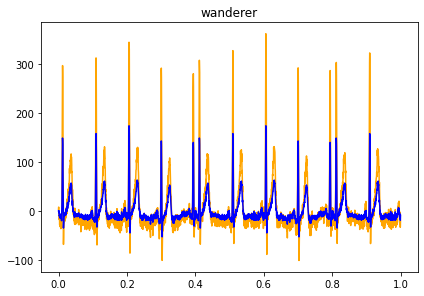

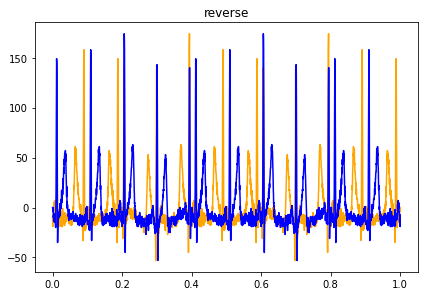

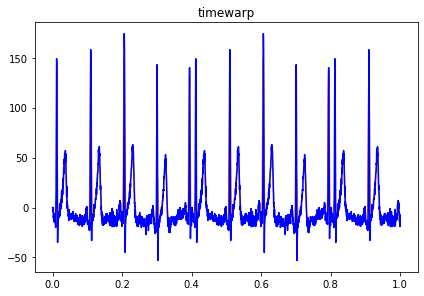

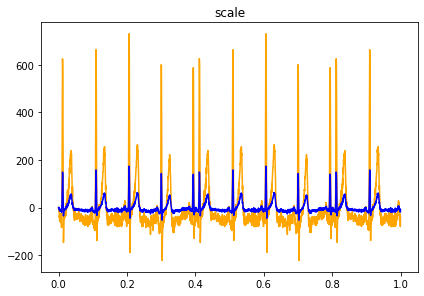

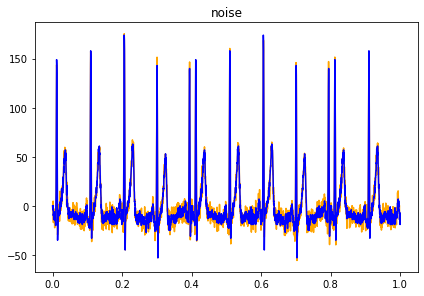

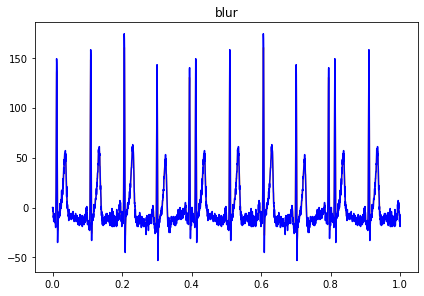

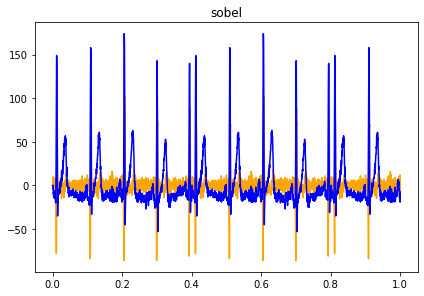

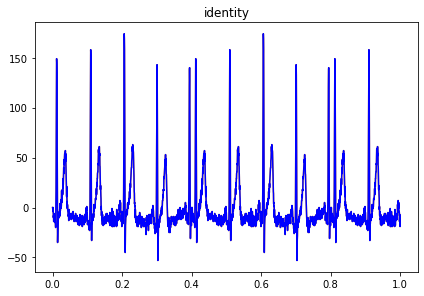

In [27]:
def plot_tleads(signal, tsignal=None, title="ECG"):
    t = np.linspace(0, 1, signal.shape[0]) 
    if tsignal is not None: 
        plt.plot(t, tsignal, color='orange')
    plt.plot(t, signal, color='blue')
    
    plt.tight_layout()
    plt.title(title)
    plt.show()



plot_tleads(lead.squeeze([0,1]), crop(lead).squeeze([0,1]), title="crop")
plot_tleads(lead.squeeze([0,1]), invert(lead).squeeze([0,1]), title="invert")
plot_tleads(lead.squeeze([0,1]), wanderer(lead).squeeze([0,1]), title="wanderer")
plot_tleads(lead.squeeze([0,1]), reverse(lead).squeeze([0,1]), title="reverse")
plot_tleads(lead.squeeze([0,1]), timewrap(lead).squeeze([0,1]), title="timewarp")
plot_tleads(lead.squeeze([0,1]), scale(lead).squeeze([0,1]), title="scale")
plot_tleads(lead.squeeze([0,1]), noise(lead).squeeze([0,1]), title="noise")
plot_tleads(lead.squeeze([0,1]), blur(lead).squeeze([0,1]), title="blur")
plot_tleads(lead.squeeze([0,1]), sobel(lead).squeeze([0,1]), title="sobel")
plot_tleads(lead.squeeze([0,1]), identity(lead).squeeze([0,1]), title="identity")




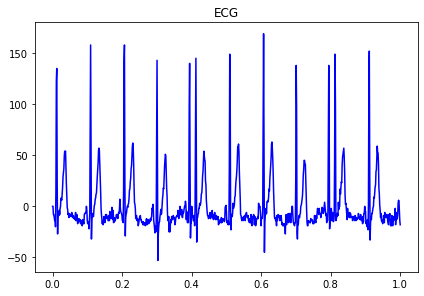

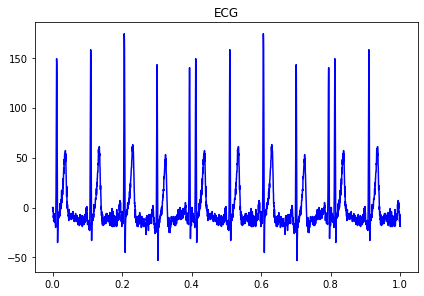

(torch.Size([833]), torch.Size([2500]))

In [9]:
from src.models.ecg_transformer import DownsamplingEmbed

downsample = DownsamplingEmbed(in_chans=1, patch_size=1)

out = downsample(lead)
out = out.squeeze([0, 1])
out = out.detach()
plot_tleads(out)
plot_tleads(lead.squeeze([0, 1]))
out.shape, lead.squeeze([0, 1]).shape

In [10]:
from src.models.ecg_transformer import DownsamplingEmbed

downsample = DownsamplingEmbed(use_mean=False, in_chans=1, embed_dim=2500)

out = downsample(lead)
out = out.detach()
plot_tleads(out.squeeze([0, 1]))
plot_tleads(lead.squeeze([0, 1]))
out.shape, lead.squeeze([0, 1]).shape, out-lead.squeeze([0, 1])


AssertionError: patchembedding size must be signal_size // patch_size

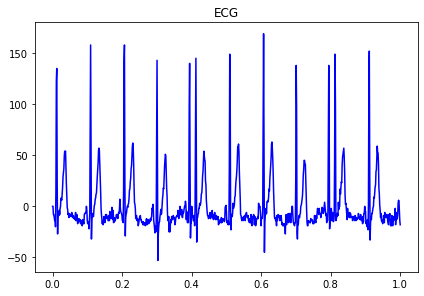

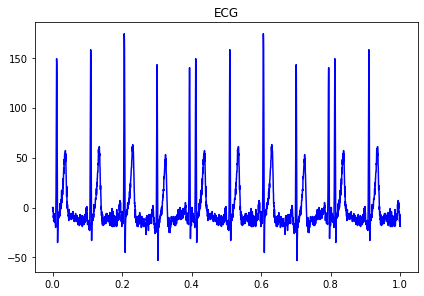

torch.Size([1, 125, 768]) torch.Size([1, 1, 2500])


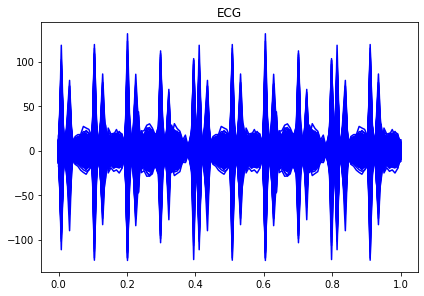

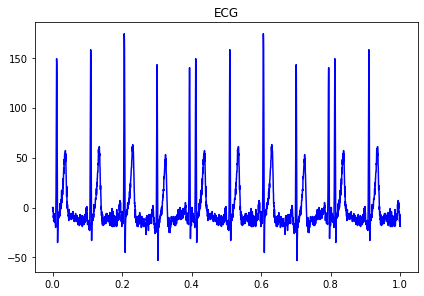

In [ ]:
from src.models.ecg_transformer import DownsamplingEmbed, PatchGroupEmbed, PatchIndependentEmbed

patch_group = PatchGroupEmbed(in_chans=1, patch_size=20)

out = patch_group(lead)
out = out.detach()
print(out.shape, lead.shape)
plot_tleads(out.squeeze([0, 1]))
plot_tleads(lead.squeeze([0, 1]))


In [ ]:
import torch
import numpy as np
from sklearn import metrics

probs = torch.Tensor([[.1192, .8808], [.2689, .7311], [.1192, .8808]])
labels = torch.Tensor([1, 0, 0])

y = np.array([[.1192, .8808], [.2689, .7311], [.1192, .8808]])
indices = np.array([0, 1, 1])

y[np.arange(len(indices)), indices], probs[torch.arange(len(labels)), labels.long()]

def auroc(logits, probs, labels):
    y_true = labels.long().detach()
    probs = probs if probs is not None else  logits.softmax(dim=1).detach()
    y_score = probs[:, 1]

    print(probs, y_score, "*"*20, y_true)
    fpr, tpr, thresholds = metrics.roc_curve(y_true.cpu().numpy(), y_score.cpu().numpy(), pos_label=1)
    return metrics.auc(fpr, tpr)

auroc(None, probs=probs, labels=labels)

tensor([[0.1192, 0.8808],
        [0.2689, 0.7311],
        [0.1192, 0.8808]]) tensor([0.8808, 0.7311, 0.8808]) ******************** tensor([1, 0, 0])


0.75

In [ ]:
import torch

a = torch.zeros(5, 2, 4)
a_l = [len(_) for _ in a]

a_l

[2, 2, 2, 2, 2]

In [ ]:
import os
output_file = '/home/achil/output.txt'
epoch = 1
fname, ext = os.path.splitext(output_file)
f'{fname}-ep.{epoch}{ext}'
        

'/home/achil/output-ep.1.txt'

In [ ]:
def evaluate_marks(x, marks):
    return sum([m[0]*m[1] for m in marks]), x

#bcm1503
x = 46*100/59
mrks = [(.25, 89.61), (.3, 66.52), (.3, x), (.05, 93.06), (.05, 95.83), (.05, 88.89)]
    
#bcm2003
x = 87
mrks = [(.06, 100), (.06, 92.31), (.12, 73.06), (.11, 82.26), (.12, 81.71), (.11, 91.67), (.06, 78.13), (.06, 87.5), (.3, x)]

evaluate_marks(x, mrks)

(85.2811, 87)

In [ ]:
x = 80/100


In [ ]:
from sklearn import metrics
import torch
from src.utils.logging import recall

labels = torch.Tensor([0, 1, 0, 0, 1])
predictions = torch.Tensor([0, 0, 0, 0, 0])

(labels*(labels == predictions).int()).sum(dtype=int).item()

metrics.recall_score(labels.numpy(), predictions.numpy())


0.0

In [ ]:
import torch
import torch.nn as nn

class PatchEmbed(nn.Module):
    """ Image to Patch Embedding
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super().__init__()
        num_patches = (img_size // patch_size) * (img_size // patch_size)
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        print(0, x.shape)
        B, C, H, W = x.shape
        x = self.proj(x)
        print(1, x.shape)
        x = x.flatten(2)
        print(2, x.shape)
        x = x.transpose(1, 2)
        print(3, x.shape)
        return x


imgs = torch.zeros(1, 3, 224, 224)
patch = PatchEmbed()

imgs.shape, patch(imgs).shape

0 torch.Size([1, 3, 224, 224])
1 torch.Size([1, 768, 14, 14])
2 torch.Size([1, 768, 196])
3 torch.Size([1, 196, 768])


(torch.Size([1, 3, 224, 224]), torch.Size([1, 196, 768]))

In [25]:
import torch
from src.models.ecg_transformer import ecgt_tiny
from src.models.simclr import simclr_ecgresnet

model = ecgt_tiny(patch_size=20)
encoder, _, _ = simclr_ecgresnet()
ecgs = torch.zeros(2, 12, 2500)

x = model(ecgs)
y = encoder(ecgs)
x.shape, y.shape, x.transpose(0, 1)[0].shape
x[:, 0] == x.transpose(0, 1)[0]

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, T

In [41]:
import torch
from einops import rearrange, reduce
b, n, d, nh = 7, 5, 12, 3
hs = d // nh
x = torch.rand(b, n, d)
qkv = torch.nn.Linear(d, 3*d)

y = qkv(x)
s1 = (x.shape, y.shape)

ry = rearrange(y, 'b n (grp nh hs) -> grp b nh n hs', grp=3, nh=nh)
ry2 = qkv(x).reshape(b, n, 3, nh, hs).permute(2, 0, 3, 1, 4)
        
q, k, v = ry[0], ry[1], ry[2]

#k = rearrange(k, 'b nh n hs -> b nh hs n')

att = (q @ k.transpose(-2, -1)).softmax(dim=-1)

z = rearrange(att @ v, 'b nh n hs -> b n (nh hs)')

x.shape, s1, ry.shape, att.shape, z.shape

_1st_batch_elt_2nd_item_in_seq_k_h_1 = y[0, 1, 16:20]
x.shape, s1, ry.shape, att.shape, z.shape, _1st_batch_elt_2nd_item_in_seq_k_h_1 == ry[1][0, 1, 1]#, ry2 == ry


(torch.Size([7, 5, 12]),
 (torch.Size([7, 5, 12]), torch.Size([7, 5, 36])),
 torch.Size([3, 7, 3, 5, 4]),
 torch.Size([7, 3, 5, 5]),
 torch.Size([7, 5, 12]),
 tensor([True, True, True, True]))

In [92]:
import torch
from einops import rearrange
b, d, c, n =7, 625, 12, 2500
npc = n//d
x = torch.rand(b, c, n)
y = rearrange(x, 'b c (np dim)-> b (c np) dim', dim=d)

i,l,k=4,2,3 
#i=l=k=0
npc, x.shape, y.shape, (i, l,  k*d, (k+1)*d), (i, l*npc+k), x[i, l, k*d:(k+1)*d] == y[i, l*npc+k]

(4,
 torch.Size([7, 12, 2500]),
 torch.Size([7, 48, 625]),
 (4, 2, 1875, 2500),
 (4, 11),
 tensor([True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True